In [1]:
import seaborn
import ranking as r
import validate_model as vm
import create_model as cm
%matplotlib inline 
%run first_model.py
%load_ext autoreload
%autoreload 2

[INFO] This trial license of GraphLab Create is assigned to lax.cary@gmail.com and will expire on October 09, 2015. Please contact trial@dato.com for licensing options or to request a free non-commercial license for personal or academic use.

[INFO] Start server at: ipc:///tmp/graphlab_server-4829 - Server binary: /home/ubuntu/anaconda/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1442283675.log
[INFO] GraphLab Server Version: 1.5.2


PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 319332 observations with 30287 users and 109 items.
PROGRESS:     Data prepared in: 0.134988s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 1        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | max_iterations                 | Maximum Number of Iterations           

In [18]:
athlete_ratings, segment_ratings, models = cm.df_to_latent_features(training_df)

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 319332 observations with 30287 users and 109 items.
PROGRESS:     Data prepared in: 0.130993s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 1        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | max_iterations                 | Maximum Number of Iterations           

In [19]:
vm.testing_rmse(models, training_df)

[0.3779975020232334, 0.23576200364715222, 0.48593139454948492]

In [20]:
vm.evaluate_latent_feature_correlations(training_df, segment_ratings)

,total_rating,uphill_rating,downhill_rating
seg_average_grade,0.788507,0.415395,-0.262117
seg_distance,0.188188,-0.192642,-0.337788
seg_maximum_grade,0.187895,0.101586,-0.101048
total_rating,1.000000,0.143611,-0.634287
uphill_rating,0.143611,1.000000,NaN
downhill_rating,-0.634287,NaN,1.000000


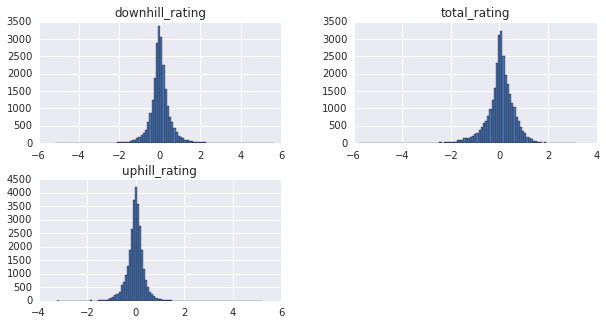

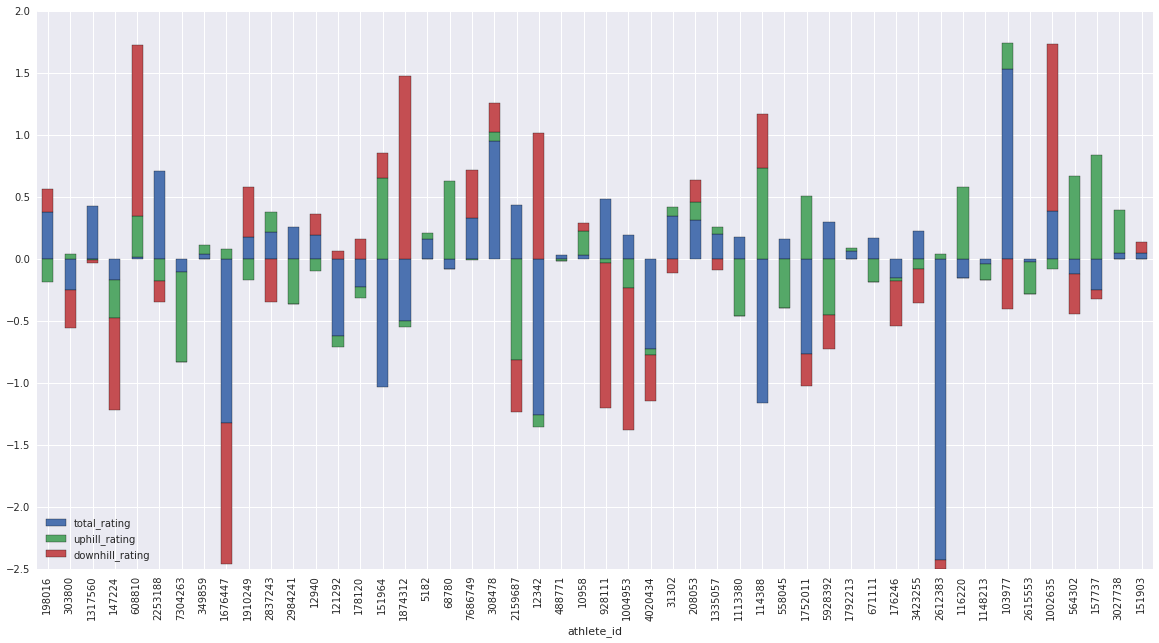

In [7]:
vm.plot_ratings(athlete_ratings)

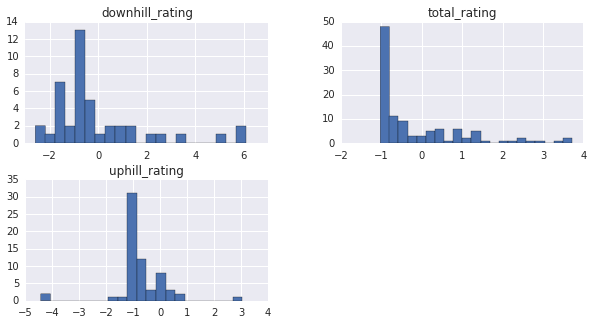

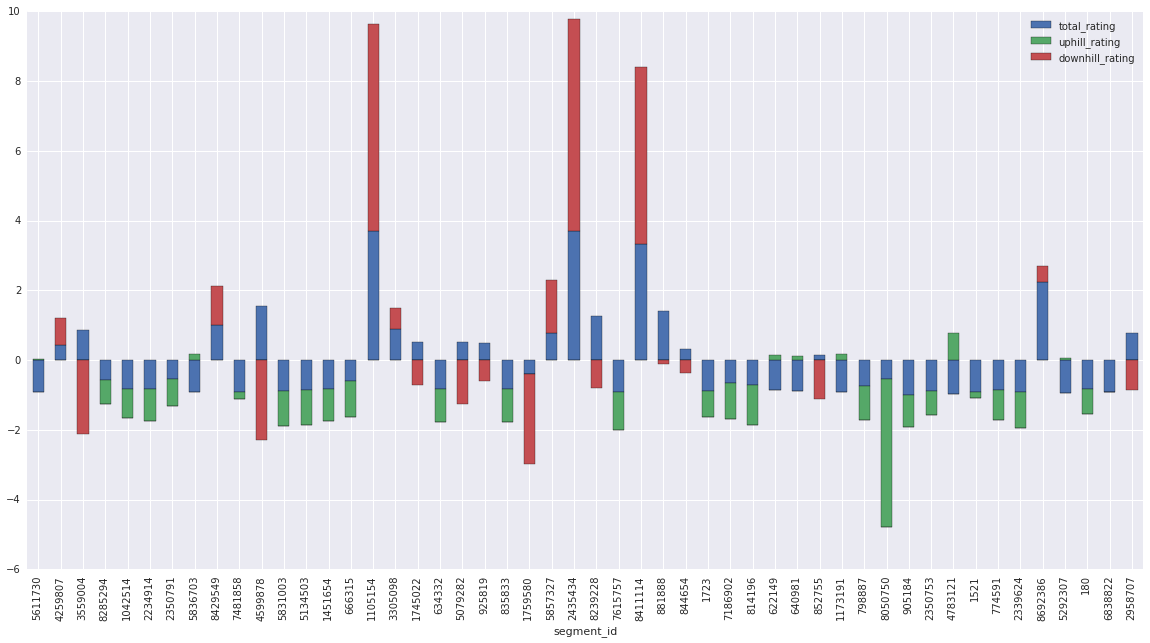

In [8]:
vm.plot_ratings(segment_ratings)

In [59]:
leaderboards = r.get_all_leaderboards(athlete_ratings, file_path='../app/app_data/leaderboards.pkl')
leaderboards

[      athlete_id    rating_1
 rank                        
 1        1794874  100.000000
 2        8531353   98.826348
 3        3282892   96.737150
 4           5165   96.533978
 5         259304   96.416115
 6        5503166   91.671078
 7         180412   90.451091
 8        5001009   89.489381
 9        7727315   88.834785
 10       4619284   88.630968
 11       2740719   88.599874
 12        220863   88.520482
 13        129795   88.003177
 14        979905   87.737061
 15       5559556   87.700485
 16        231057   85.475465
 17         62942   84.855188
 18       7733414   84.821906
 19       6038543   83.716546
 20         80835   82.339221]

In [21]:
athlete_ratings.mean()

total_rating      -0.029969
uphill_rating      0.003563
downhill_rating   -0.002724
dtype: float64

In [62]:
df.query('segment_id == 6135256').mean().average_speed

13.363436536691969

In [71]:
df.groupby(['athlete_id', 'segment_id']).average_speed.mean().std()

3.467558617588132

In [26]:
downhill_test_df = testing_df.query('seg_average_grade < 0')

In [27]:
downhill_test_df.shape

(18682, 18)